# Pymaceuticals Inc.
---

### Analysis
In this data I was able to extract a lot of different insights for this data. The best insight, I would say with our analysis on the given results, is that Capomulin and Ramicane were better performers in reduceing average tumor volume than any other medications that I analyzed. In the boxplot below, it shows that of 4 observed medications they had the best results in final tumor size based on their respective data sets. It is clear that more research should be done on these specific medications as they are working the best out of all given medications.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df = pd.merge(study_results, mouse_metadata, on='Mouse ID', how='left')

# Display the data table for preview
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
count = merged_df['Mouse ID'].nunique()
count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# Check for duplicated time points
duplicated_data = merged_df[merged_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

if not duplicated_data.empty:
    print('Mice with duplicated time points:')
    print(duplicated_data)
else:
    print('No mice with duplicated time points found.')


Mice with duplicated time points:
     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
107      g989          0           45.000000                 0     Propriva   
137      g989          0           45.000000                 0     Propriva   
329      g989          5           48.786801                 0     Propriva   
360      g989          5           47.570392                 0     Propriva   
620      g989         10           51.745156                 0     Propriva   
681      g989         10           49.880528                 0     Propriva   
815      g989         15           51.325852                 1     Propriva   
869      g989         15           53.442020                 0     Propriva   
950      g989         20           55.326122                 1     Propriva   
1111     g989         20           54.657650                 1     Propriva   

         Sex  Age_months  Weight (g)  
107   Female          21          26  
137   Female      

In [4]:
duplicate_mouse = merged_df[merged_df['Mouse ID']=='g989']
duplicate_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged_df[merged_df['Mouse ID'] != 'g989']
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
clean_df['Mouse ID'].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.

regimen_df = clean_df.groupby(['Drug Regimen'])
mean = regimen_df['Tumor Volume (mm3)'].mean()
median = regimen_df['Tumor Volume (mm3)'].median()
variance = regimen_df['Tumor Volume (mm3)'].var()
standard = regimen_df['Tumor Volume (mm3)'].std()
sem = regimen_df['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
tumor_summary_df = pd.DataFrame({'Mean Tumor Volume' : mean,
                                 'Median Tumor Volume' : median,
                                 'Tumor Volume Variance' : variance,
                                 'Tumor Volume Std. Dev.' : standard,
                                 'Tumor Volume SEM' : sem
                                })
tumor_summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_df = regimen_df['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem']).style.set_caption('Tumor Volume (mm3)')
summary_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

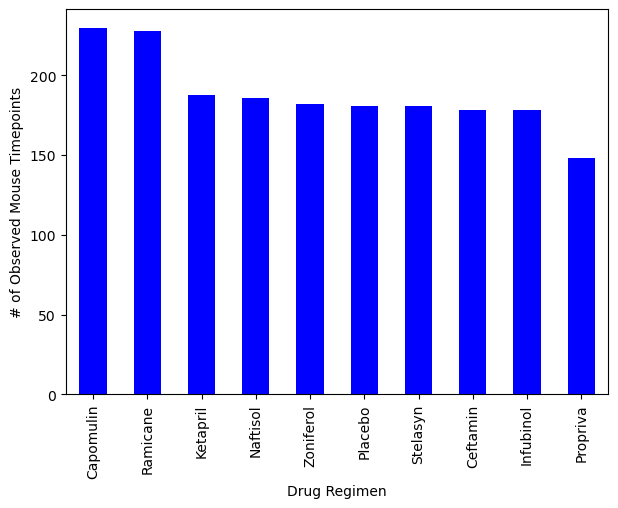

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

regimen_group = regimen_df.size()

regimen_group.sort_values(ascending=False).plot(kind='bar', ylabel='# of Observed Mouse Timepoints', color='blue', figsize=(7, 5))


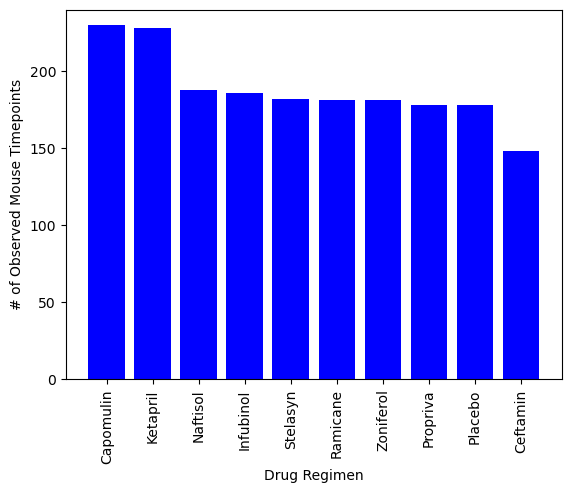

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = clean_df['Drug Regimen'].unique()
y_axis = regimen_df['Timepoint'].count().sort_values(ascending=False)
plt.bar(x_axis , y_axis, color='blue', align='center')
plt.xticks(rotation='vertical')
plt.ylim(0, y_axis.max()+10)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()


<Axes: ylabel='Sex'>

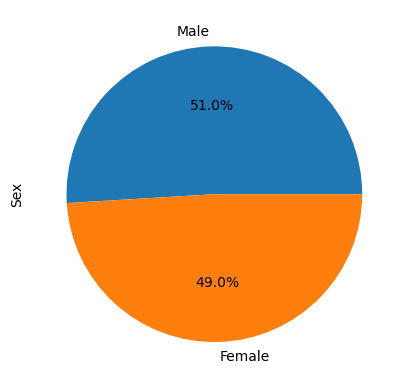

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
clean_df['Sex'].value_counts().plot(kind='pie', ylabel='Sex', autopct='%1.1f%%')


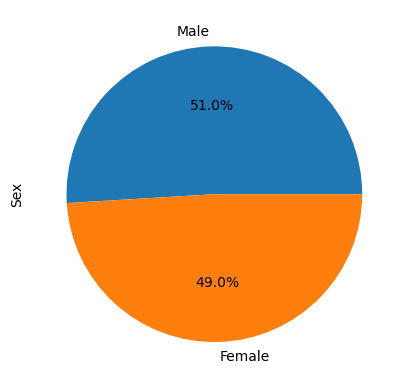

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(clean_df['Sex'].value_counts(), autopct='%1.1f%%', labels=['Male','Female'])
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_id_df = clean_df.groupby(clean_df['Mouse ID'])
max_time = mouse_id_df['Timepoint'].max()
max_time

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
df_merged = pd.merge(max_time, clean_df, on=["Mouse ID", "Timepoint"], how="inner")
df_merged

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
    
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = df_merged['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[.25]
upperq = quartiles[.75]
iqr = upperq-lowerq
print(f'The IQR for all tumor volumes is {iqr.round(3)}')

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)


    # Locate the rows which contain mice on each drug and get the tumor volumes
for drug in drugs:
    tumor_volume = df_merged.loc[df_merged['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    tumor_vol.append(tumor_volume)

    quartiles = tumor_volume.quantile([0.25, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - 1.5 * iqr
    upper_bound = upperq + 1.5 * iqr
    
    print(f'The potential outliers for {drug} are {lower_bound.round(3)} and {upper_bound.round(3)}.')


The IQR for all tumor volumes is 19.178
The potential outliers for Capomulin are 20.705 and 51.832.
The potential outliers for Ramicane are 17.913 and 54.307.
The potential outliers for Infubinol are 36.833 and 82.741.
The potential outliers for Ceftamin are 25.355 and 87.666.


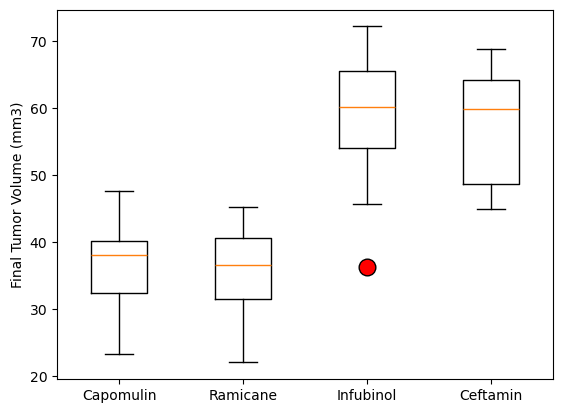

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

plt.boxplot(tumor_vol, flierprops= dict(markerfacecolor='red', markersize=12))
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1,2,3,4],drugs)
plt.show()

## Line and Scatter Plots

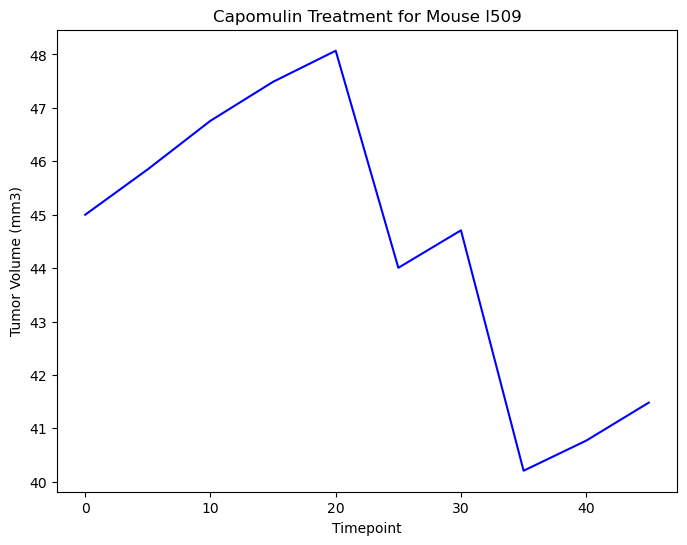

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Assuming you have a DataFrame named 'data' containing your data
# Filter the data for a single mouse treated with Capomulin
mouse_id = 'l509'
capomulin_data = clean_df[(clean_df['Drug Regimen'] == 'Capomulin') & (clean_df['Mouse ID'] == mouse_id)]

# Create the line plot
plt.figure(figsize=(8, 6))
plt.plot(capomulin_data['Timepoint'], capomulin_data['Tumor Volume (mm3)'], color='b', linestyle='-')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin Treatment for Mouse l509')
plt.show()

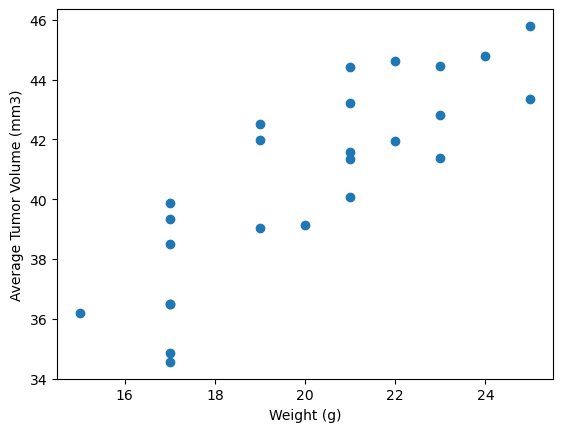

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = clean_df[(clean_df['Drug Regimen'] == 'Capomulin')]
capomulin_data = capomulin_data.groupby(capomulin_data['Mouse ID'])

avg_tumor = capomulin_data['Tumor Volume (mm3)'].mean()
weight = capomulin_data['Weight (g)'].mean()
plt.scatter(weight, avg_tumor)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is: 0.84


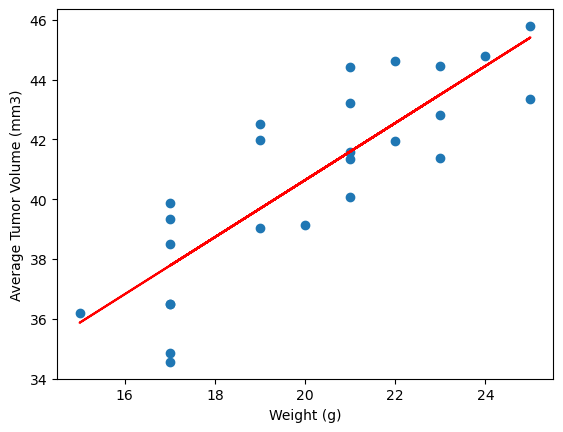

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(weight, avg_tumor)
print(f'The correlation between mouse weight and the average tumor volume is: {round(correlation[0],2)}')

slope, intercept, r, p, std_err = st.linregress(weight, avg_tumor)

line = slope * weight + intercept

plt.scatter(weight, avg_tumor)
plt.plot(weight, line, color='red')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()